### Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc 
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report,precision_score,recall_score
import scikitplot as skplt
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, \
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE

### Import Data

In [2]:
#importing datasets
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df_people = pd.read_csv('Traffic_Crashes_-_People.csv')
df_vehicles = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
df.head()

/Users/avijames/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/avijames/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [3]:
df_people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [4]:
df_vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540478 entries, 0 to 540477
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                540478 non-null  object 
 1   RD_NO                          535865 non-null  object 
 2   CRASH_DATE_EST_I               40975 non-null   object 
 3   CRASH_DATE                     540478 non-null  object 
 4   POSTED_SPEED_LIMIT             540478 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         540478 non-null  object 
 6   DEVICE_CONDITION               540478 non-null  object 
 7   WEATHER_CONDITION              540478 non-null  object 
 8   LIGHTING_CONDITION             540478 non-null  object 
 9   FIRST_CRASH_TYPE               540478 non-null  object 
 10  TRAFFICWAY_TYPE                540478 non-null  object 
 11  LANE_CNT                       198968 non-null  float64
 12  ALIGNMENT                     

In [6]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194482 entries, 0 to 1194481
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1194482 non-null  object 
 1   PERSON_TYPE            1194482 non-null  object 
 2   CRASH_RECORD_ID        1194482 non-null  object 
 3   RD_NO                  1184064 non-null  object 
 4   VEHICLE_ID             1170908 non-null  float64
 5   CRASH_DATE             1194482 non-null  object 
 6   SEAT_NO                244261 non-null   float64
 7   CITY                   878814 non-null   object 
 8   STATE                  889261 non-null   object 
 9   ZIPCODE                802369 non-null   object 
 10  SEX                    1176424 non-null  object 
 11  AGE                    851547 non-null   float64
 12  DRIVERS_LICENSE_STATE  704797 non-null   object 
 13  DRIVERS_LICENSE_CLASS  607436 non-null   object 
 14  SAFETY_EQUIPMENT  

In [7]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105911 entries, 0 to 1105910
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1105911 non-null  int64  
 1   CRASH_RECORD_ID           1105911 non-null  object 
 2   RD_NO                     1096334 non-null  object 
 3   CRASH_DATE                1105911 non-null  object 
 4   UNIT_NO                   1105911 non-null  int64  
 5   UNIT_TYPE                 1104315 non-null  object 
 6   NUM_PASSENGERS            165722 non-null   float64
 7   VEHICLE_ID                1080617 non-null  float64
 8   CMRC_VEH_I                20447 non-null    object 
 9   MAKE                      1080612 non-null  object 
 10  MODEL                     1080469 non-null  object 
 11  LIC_PLATE_STATE           986287 non-null   object 
 12  VEHICLE_YEAR              904574 non-null   float64
 13  VEHICLE_DEFECT            1

### Merging Data

In [8]:
#Merging Datasets on the Crash_Record_ID Column
df_merge = pd.merge(df, df_vehicles, on='CRASH_RECORD_ID').reset_index()
df_merge_2 = pd.merge(df_merge, df_people, on='CRASH_RECORD_ID').reset_index()
#dropping dupllicates(basically only having one instance of the crashID on there)
df_dropped= df_merge_2.drop_duplicates(subset=['CRASH_RECORD_ID'], keep='first')
#Taking only necessary columns
columns = ['CRASH_RECORD_ID', 'RD_NO_x', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',  'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'RD_NO_y', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID_x', 'CMRC_VEH_I', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',  'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION','PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']
df_comb = df_dropped[columns]

### Cleaning Data

In [9]:
#Taking the Year from the date column
df_comb['date'] = pd.to_datetime(df_comb['CRASH_DATE_x'])
df_comb['Crash_year'] = df_comb['date'].apply(lambda date: date.year)
#only accidents with the driver
df_driver = df_comb[df_comb['PERSON_TYPE']=='DRIVER']
#necessary columns
new_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'MAKE', 'MODEL',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'MANEUVER', 'OCCUPANT_CNT', 
       'FIRST_CONTACT_POINT', 'PERSON_TYPE','SEX',
       'AGE', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION','DRIVER_VISION',
       'PHYSICAL_CONDITION', 'Crash_year']


<ipython-input-9-6efbe8c7bb70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb['date'] = pd.to_datetime(df_comb['CRASH_DATE_x'])
<ipython-input-9-6efbe8c7bb70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb['Crash_year'] = df_comb['date'].apply(lambda date: date.year)


In [11]:
#going to drop columns with lots of missing values
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                0
RD_NO_x                     3994
CRASH_DATE_x                   0
POSTED_SPEED_LIMIT             0
TRAFFIC_CONTROL_DEVICE         0
                           ...  
BAC_RESULT                     0
BAC_RESULT VALUE          519231
CELL_PHONE_USE            519792
date                           0
Crash_year                     0
Length: 78, dtype: int64

In [10]:
#Dataframe with the new columns
df_driver = df_driver[new_columns]
#check for nulls
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                       0
CRASH_DATE_x                          0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
DAMAGE                                0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
NUM_UNITS                             0
MOST_SEVERE_INJURY                    0
INJURIES_TOTAL                        0
INJURIES_FATAL                        0
INJURIES_INCAPACITATING               0
INJURIES_NON_INCAPACITATING           0
INJURIES_REPORTED_NOT_EVIDENT         0
CRASH_HOUR                            0
CRASH_DAY_OF_WEEK                     0


In [17]:
#dropping missing values
df_driver.dropna(axis=0, subset=['LATITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['LONGITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['MODEL'], inplace =True)
df_driver.dropna(axis=0, subset=['MAKE'], inplace =True)
df_driver.dropna(axis=0, subset=['FIRST_CONTACT_POINT'], inplace =True)

In [13]:
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                       0
CRASH_DATE_x                          0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
DAMAGE                                0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
NUM_UNITS                             0
MOST_SEVERE_INJURY                    0
INJURIES_TOTAL                        0
INJURIES_FATAL                        0
INJURIES_INCAPACITATING               0
INJURIES_NON_INCAPACITATING           0
INJURIES_REPORTED_NOT_EVIDENT         0
CRASH_HOUR                            0
CRASH_DAY_OF_WEEK                     0


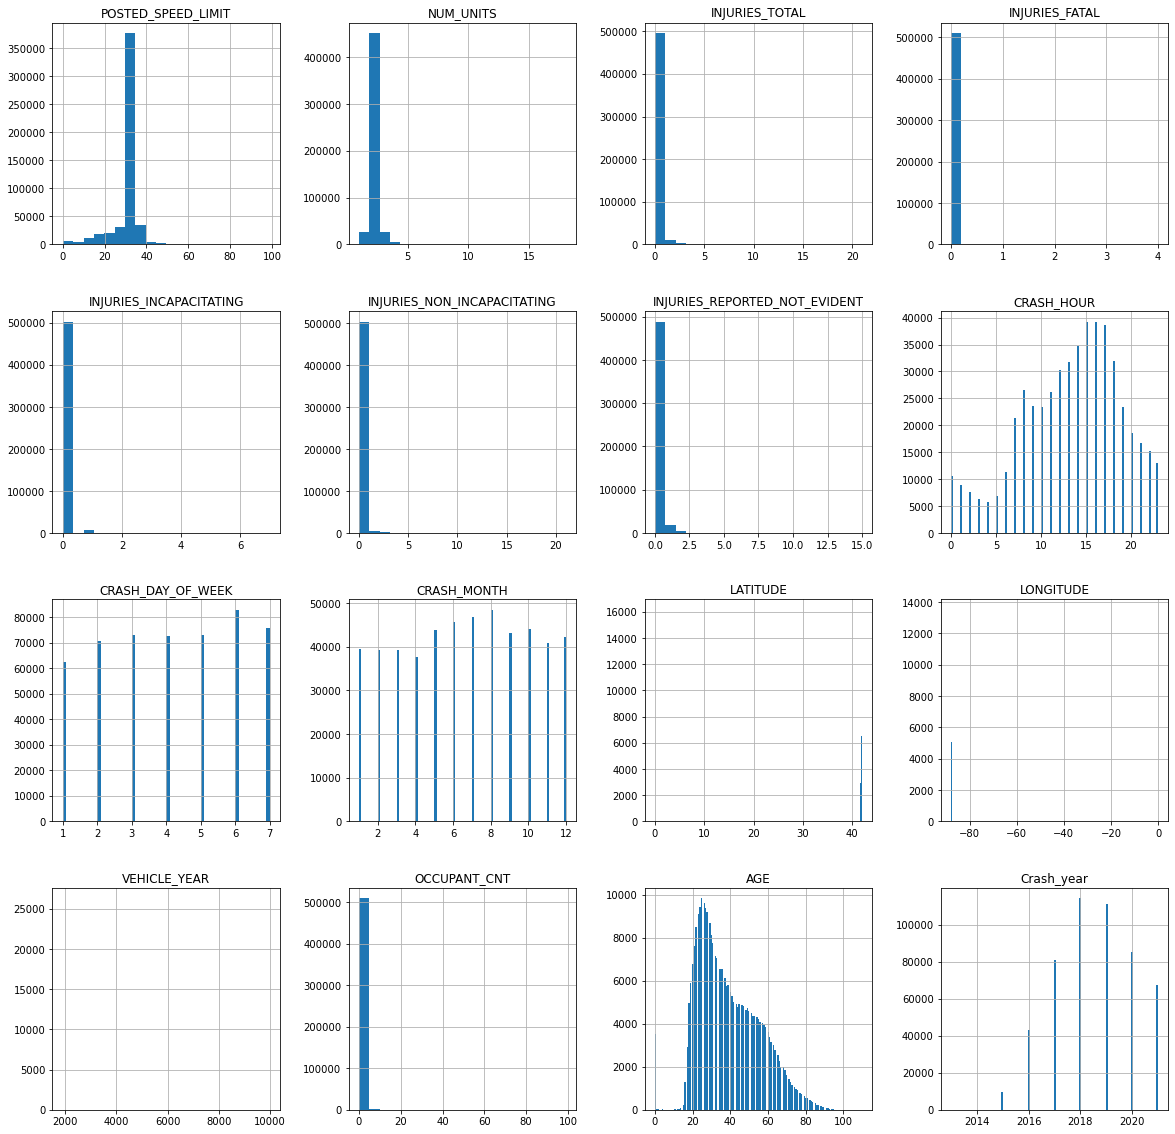

In [15]:
df_driver.hist(figsize=(20,20), bins='auto');

In [14]:
#fill in the missing AGE values with the mode of 25
df_driver['AGE'].fillna(df_driver['AGE'].mode()[0], inplace = True) 
df_driver['AGE'].isnull().sum()

0

In [15]:
# Remove outliers

# By looking at the graph above, we are going to remove data with Vehicle_Year below 1970 and greater than 2022
df_driver = df_driver[df_driver['VEHICLE_YEAR'] < 2022]
df_driver = df_driver[df_driver['VEHICLE_YEAR'] > 1970]
print(df_driver['VEHICLE_YEAR'].describe())
print(df_driver['VEHICLE_YEAR'].isnull().sum())

count    380830.000000
mean       2009.664850
std           6.246146
min        1971.000000
25%        2005.000000
50%        2010.000000
75%        2015.000000
max        2021.000000
Name: VEHICLE_YEAR, dtype: float64
0


In [18]:
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                   0
CRASH_DATE_x                      0
POSTED_SPEED_LIMIT                0
TRAFFIC_CONTROL_DEVICE            0
DEVICE_CONDITION                  0
WEATHER_CONDITION                 0
LIGHTING_CONDITION                0
FIRST_CRASH_TYPE                  0
TRAFFICWAY_TYPE                   0
ALIGNMENT                         0
ROADWAY_SURFACE_COND              0
ROAD_DEFECT                       0
CRASH_TYPE                        0
DAMAGE                            0
PRIM_CONTRIBUTORY_CAUSE           0
SEC_CONTRIBUTORY_CAUSE            0
NUM_UNITS                         0
MOST_SEVERE_INJURY                0
INJURIES_TOTAL                    0
INJURIES_FATAL                    0
INJURIES_INCAPACITATING           0
INJURIES_NON_INCAPACITATING       0
INJURIES_REPORTED_NOT_EVIDENT     0
CRASH_HOUR                        0
CRASH_DAY_OF_WEEK                 0
CRASH_MONTH                       0
LATITUDE                          0
LONGITUDE                   

In [9]:
df_driver['SEX'].value_counts()

M    226014
F    134585
X     16593
Name: SEX, dtype: int64

In [19]:
#fill in the missing SEX values with the mode of M
df_driver['SEX'].fillna(df_driver['SEX'].mode()[0], inplace = True) 
df_driver['SEX'].isnull().sum()

0

In [20]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377216 entries, 0 to 2527117
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                377216 non-null  object 
 1   CRASH_DATE_x                   377216 non-null  object 
 2   POSTED_SPEED_LIMIT             377216 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         377216 non-null  object 
 4   DEVICE_CONDITION               377216 non-null  object 
 5   WEATHER_CONDITION              377216 non-null  object 
 6   LIGHTING_CONDITION             377216 non-null  object 
 7   FIRST_CRASH_TYPE               377216 non-null  object 
 8   TRAFFICWAY_TYPE                377216 non-null  object 
 9   ALIGNMENT                      377216 non-null  object 
 10  ROADWAY_SURFACE_COND           377216 non-null  object 
 11  ROAD_DEFECT                    377216 non-null  object 
 12  CRASH_TYPE                   

In [22]:
#Dropping the 'unable to determine' values in the Primary Contributory Cause 
df_driver= df_driver[(df_driver['PRIM_CONTRIBUTORY_CAUSE'] != "UNABLE TO DETERMINE")]
df_driver.to_csv('Cleaned_Crashes_2')

In [23]:
df=pd.read_csv('Cleaned_Crashes_2')

### Need to trim the categories within our target dataset


In [24]:
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace(r'[^\w\s]+', '')
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':'BICYCLE ADVANCING LEGALLY ON RED LIGHT'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'BICYCLE ADVANCING LEGALLY ON RED LIGHT':'TURNING RIGHT ON RED'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'PASSING STOPPED SCHOOL BUS':'RELATED TO BUS STOP'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'RELATED TO BUS STOP':'SCHOOL BUS RELATED'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'TEXTING':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'CELL PHONE USE OTHER THAN TEXTING':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING YIELD SIGN':'DISREGARDING ROAD MARKINGS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING ROAD MARKINGS':'DISREGARDING OTHER TRAFFIC SIGNS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ANIMAL':'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'EXCEEDING SAFE SPEED FOR CONDITIONS':'EXCEEDING AUTHORIZED SPEED LIMIT'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'EXCEEDING AUTHORIZED SPEED LIMIT':'SPEEDING'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISTRACTION - FROM OUTSIDE VEHICLE':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISTRACTION - FROM INSIDE VEHICLE':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING OTHER TRAFFIC SIGNS':'DISREGARDING TRAFFIC SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING TRAFFIC SIGNALS':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING STOP SIGN':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER THE INFLUENCE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DRIVING ON WRONG SIDE/WRONG WAY':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ROAD CONSTRUCTION/MAINTENANCE':'ROAD ENGINEERING/SURFACE/MARKING DEFECTS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':'ROAD CONSTRUCTION/MAINTENANCE/DEFECTS' })
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'IMPROPER OVERTAKING/PASSING':'IMPROPER LANE USAGE' })
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'PHYSICAL CONDITION OF DRIVER':'OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER THE INFLUENCE' })
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'FOLLOWING TOO CLOSELY':'FAILING TO REDUCE SPEED TO AVOID CRASH'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'FAILING TO REDUCE SPEED TO AVOID CRASH':'FAILING TO REDUCE SPEED TO AVOID CRASH/TOO CLOSE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'IMPROPER TURNING/NO SIGNAL':'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'IMPROPER BACKING':'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'TURNING RIGHT ON RED':'FAILING TO YIELD RIGHT-OF-WAY'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'SPEEDING':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':'PHYSICAL ROAD HINDERANCES'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ROAD CONSTRUCTION/MAINTENANCE/DEFECTS':'PHYSICAL ROAD HINDERANCES'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':'PHYSICAL ROAD HINDERANCES'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'OBSTRUCTED CROSSWALKS':'PHYSICAL ROAD HINDERANCES'})
#taking out the 'Not applicable' cause
df= df[(df['PRIM_CONTRIBUTORY_CAUSE'] != "NOT APPLICABLE")]
#dropping unneccsary columns
df = df.drop(['CRASH_RECORD_ID', 'CRASH_DATE_x', 'LATITUDE', 'LONGITUDE'], axis=1)

## EDA cont.. + Visualizations

In [25]:
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO REDUCE SPEED TO AVOID CRASH/TOO CLOSE             63098
FAILING TO YIELD RIGHT-OF-WAY                                47546
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                          44775
IMPROPER LANE USAGE                                          33271
DISREGARDING TRAFFIC SIGNS/SIGNALS                           17484
OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER THE INFLUENCE    10287
WEATHER                                                       7254
DISTRACTION                                                   6651
PHYSICAL ROAD HINDERANCES                                     6024
EQUIPMENT - VEHICLE CONDITION                                 2926
SCHOOL BUS RELATED                                             179
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

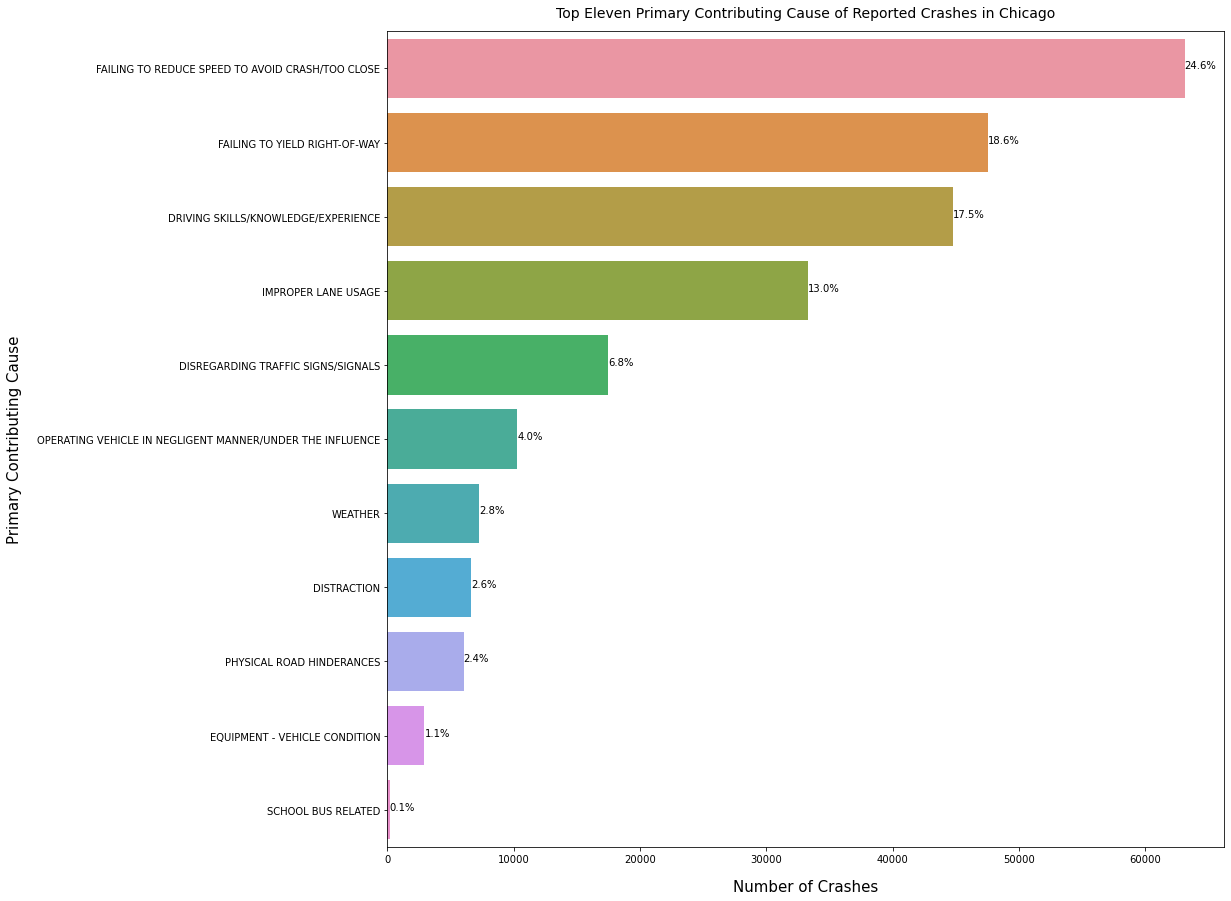

In [28]:
plt.figure(figsize=(15, 15))
ax = sns.countplot(data=df,  y='PRIM_CONTRIBUTORY_CAUSE', order = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().iloc[:11].index)
total = len(df_driver['PRIM_CONTRIBUTORY_CAUSE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Top Eleven Primary Contributing Cause of Reported Crashes in Chicago', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=15, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=15, labelpad=15)
plt.show();

Text(0.5, 1.0, 'Amount of Car Crashes per Day of Week')

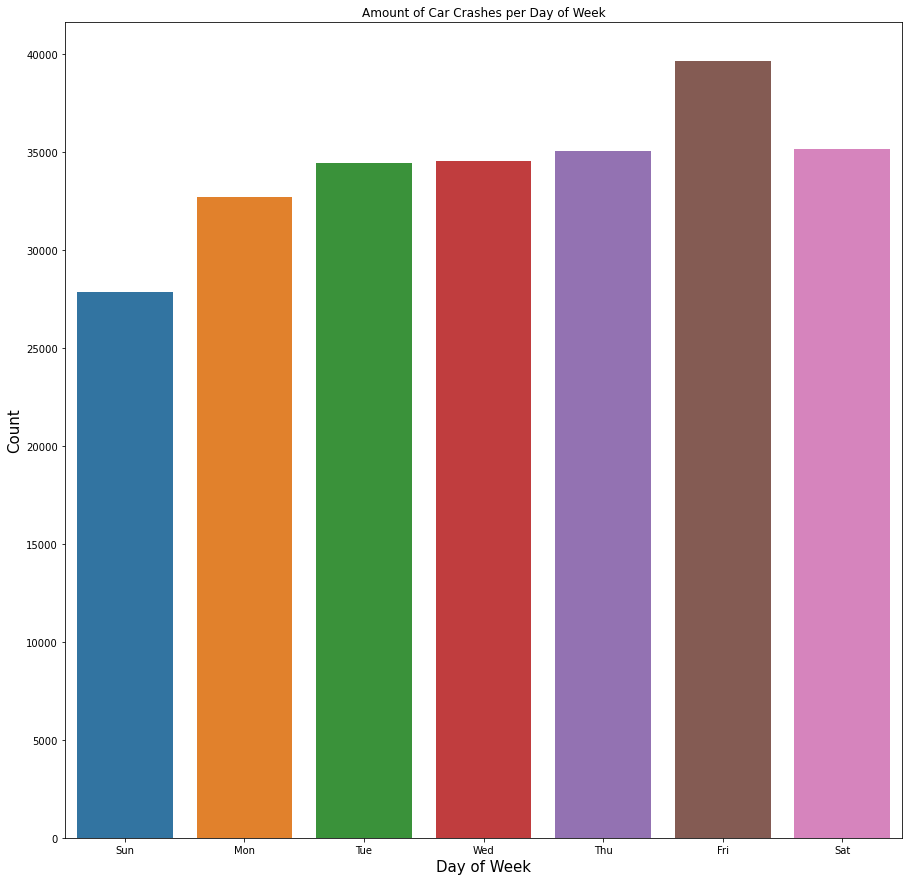

In [32]:
injury_day = df.groupby('CRASH_DAY_OF_WEEK')['INJURIES_TOTAL'].sum()
weekday_order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
plt.figure(figsize=(15, 15))
ax= sns.barplot(x=injury_day.index, y=df.groupby("CRASH_DAY_OF_WEEK")["CRASH_DAY_OF_WEEK"].count().values)

ax.set_xticklabels(weekday_order)
ax.set_xlabel("Day of Week",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Amount of Car Crashes per Day of Week')

## Dummy Model 
#### Baseline

In [31]:
X = df.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy.score(X_train, y_train)

0.26346028582404063

### From here I'm going to focus on AUC since this will allow us to see the models ability to distinguish between classes

This is a function to help us get the AUC score for multiple classification

In [15]:
def multiclass_roc_auc_score(y_test, y_pred, average="micro"):
    # binarizing my features
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

## Logistic Regression 
#### Starting off by only using the int64 DataTypes

In [32]:
log_int_df= df.select_dtypes('int64')
X = log_int_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
logreg =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))

Accuracy: 0.29122824598323144 


/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Getting an accuracy of only 29%. That is a slight improvement but let's try a few more to get better

#### Trying only 'float64' DataTypes

In [33]:
log_float_df= df.select_dtypes('float64')
X = log_float_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
logreg =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=400)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))

Accuracy: 0.26707752947857166 


/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This barely did better than our baseline

#### Using Dummy Variables with Select Columns

In [16]:
columns =['TRAFFIC_CONTROL_DEVICE',
       'ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION',]
df_new = df[columns]
new_df = df_new
# getting dummies
dummy_df=pd.get_dummies(new_df, columns= ['TRAFFIC_CONTROL_DEVICE','ROADWAY_SURFACE_COND','DEVICE_CONDITION', 
                                          'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION'], drop_first=True)
X = dummy_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
logreg_dummy =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=400)
logreg_dummy.fit(X_train, y_train)
y_pred = logreg_dummy.predict(X_test)
acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5550489360991415 
AUC: 0.755276914854528


In [37]:
##Cross Validation
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
mean_cross_score = np.mean(cross_val_score(logreg_dummy, X, y, cv=cv))
mean_cross_score

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.5570154073125584

In [36]:
#see if our model is missing any classes
confusion_matrix(y_test, y_pred)

array([[ 1517,     0,   592,     0,   302,  1622,   122,    82,    18,
            0,   116],
       [   67,     4,   545,     0,   678,   154,    98,    40,    42,
            0,    35],
       [  272,     6,  4863,     0,  1308,  3456,   860,    98,   131,
            0,   200],
       [   37,     0,   375,     0,   167,    37,    43,     9,    22,
            0,    41],
       [  186,     3,  1239,     0, 12321,  1073,   535,   183,    36,
            0,   199],
       [  608,     0,  1025,     0,   380,  7492,  2232,    29,    69,
            0,    51],
       [  103,     0,  1622,     0,   375,  1236,  4814,    81,    27,
            0,    60],
       [   86,     1,   612,     0,   273,   152,   167,  1227,    21,
            0,    33],
       [   38,     1,   430,     0,   108,   395,   102,    10,   333,
            0,    89],
       [    0,     0,    10,     0,     6,     9,    15,     2,     2,
            0,     1],
       [   77,     0,   183,     0,   528,   236,    83,    

It is missing classes so we will use a resampling method later on to fix the imbalance

Much better on accuracy than our baseline and also a decent AUC Score.
Let's see if we can get higher by combning the int64 and dummy columns

#### Concat for int64 and dummy Log

In [38]:
concat_df = pd.concat([dummy_df,log_int_df],axis=1)
X = concat_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
logreg =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=400)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.48020843771921035 
AUC: 0.7141146407455659


This model actually did worse than before so let's stick to our Dummy Columns

## KNN Model
#### Chooing a K Value with Elbow Method

In [17]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

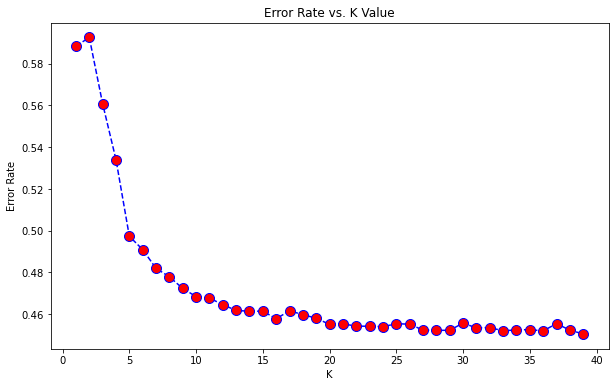

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Going to use 20 for n_neighbors

#### Dummy Variables KNN with a cross validation

In [20]:
X = dummy_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
knn_dummy = KNeighborsClassifier(n_neighbors=20)
knn_dummy.fit(X_train,y_train)
y_pred = knn_dummy.predict(X_test)
acc_dummy_knn = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_dummy_knn))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
print(cross_val_score(knn, X_train, y_train, cv=5))

Accuracy: 0.5448942779837659 
AUC: 0.7496918528910713
[0.54675017 0.54971607 0.54247857 0.53487919 0.54297962]


## Decision Tree

In [21]:
X = dummy_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
acc_dtree=accuracy_score(predictions, y_test)
print('Accuracy: {} '.format(acc_dtree))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, predictions)))

Accuracy: 0.5504893609914153 
AUC: 0.7527691485452783


Doing a grid search to find the best parameters

In [22]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(dtree, param_grid, cv=5)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validatio

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validatio

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validatio

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validatio

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validatio

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}

Fitting with the best parameters

In [23]:
dtree_grid = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_split= 20)
dtree_grid.fit(X_train,y_train)
predictions = dtree_grid.predict(X_test)
acc_dtree=accuracy_score(predictions, y_test)
print('Accuracy: {} '.format(acc_dtree))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, predictions)))

Accuracy: 0.5486688712963891 
AUC: 0.7517678792130139


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier(max_depth=7, n_estimators=250, random_state=42)
randf.fit(X_train, y_train)
y_pred = randf.predict(X_test)
acc_rand = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_rand))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

Accuracy: 0.5082506597187427 
AUC: 0.7295378628453084


## XG Boost

In [25]:
X = dummy_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
xgboost= xgb.XGBClassifier(objective='multi:softmax', random_state=42, max_depth=3, gamma=1)
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
acc_xgb = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_xgb))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

/Users/avijames/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.5579884423956977 
AUC: 0.7568936433176338


Performs the best on accuracy and AUC

Now let's do a confusion matrix

In [26]:
print(confusion_matrix(y_test,y_pred))

[[ 1484     0   566     0   308  1638   142    97    18     0   118]
 [   60     0   543     0   678   154   102    55    35     0    36]
 [  235     2  4806     0  1311  3518   880   122   103     0   217]
 [   27     0   375     0   169    35    44    14    24     0    43]
 [  172     1  1215     0 12327  1075   549   210    33     0   193]
 [  535     1   944     0   372  7627  2252    35    51     0    69]
 [   99     0  1593     0   375  1186  4900    85    19     0    61]
 [   73     1   587     0   275   163   167  1253    19     0    34]
 [   29     0   424     0   111   405   107    20   319     0    91]
 [    0     0    10     0     6     8    16     2     2     0     1]
 [   63     1   164     0   531   252    67    20    22     0   693]]


Which model performs the best?

In [27]:
log_reg_score =logreg_dummy.score(X_test, y_test)
knn_score =knn_dummy.score(X_test, y_test)
dt_grid_score = dtree_grid.score(X_test, y_test)
rf_score = randf.score(X_test, y_test)
xg_score = xgboost.score(X_test, y_test)


print('Logistic Regression: ', log_reg_score)
print('KNN: ', dt_grid_score)
print('Decision tree grid search: ', dt_grid_score)
print('Random Forest: ', rf_score)
print('XGBoost: ', xg_score)

Logistic Regression:  0.5550489360991415
KNN:  0.5486688712963891
Decision tree grid search:  0.5486688712963891
Random Forest:  0.5082506597187427
XGBoost:  0.5579884423956977


## SMOTE Sampling to bring up the imbalanced classes

In [28]:
X = dummy_df
y = df['PRIM_CONTRIBUTORY_CAUSE']

# performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42,stratify=y)

# standardizing the data
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# handling the imbalance with SMOTE
smote = SMOTE(k_neighbors=6)
X_train, y_train = smote.fit_resample(X_train, y_train)

#### XG Boost with SMOTE

In [29]:
xgboost= xgb.XGBClassifier(objective='multi:softmax', random_state=42, max_depth=3, gamma=1)

xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

acc_xgb = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_xgb))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

/Users/avijames/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.46716437852824266 
AUC: 0.7069404081905335


Performed worse than our model without SMOTE, let's see the confusion matrix

In [30]:
print(confusion_matrix(y_test,y_pred))

[[ 2375    10   328   149   215   488   161   198   110     4   333]
 [   86    63    79   371   548    78    93   104   105     3   133]
 [  795    86  2640  1846  1116  2214   856   452   427   129   633]
 [   27     9    33   303   139    19    44    33    34     3    87]
 [  405    89   553   523 10347   597   511   511   136    60  2043]
 [ 2466    11  1295   193   314  4042  2001    83   754   222   505]
 [  350    23   858   612   322   661  4558   199   154   315   266]
 [  109    10   220   160   181    99   164  1479    48    14    88]
 [   28    24    41   262    53    72    84    33   743    16   150]
 [    0     0     3     6     6     6    14     3     3     3     1]
 [   68     0    15    37    59    87    44    39    44     2  1418]]


#### Logisitic Regression with SMOTE

In [31]:
logreg_dummy =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=400)

logreg_dummy.fit(X_train, y_train)
y_pred = logreg_dummy.predict(X_test)


acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

Accuracy: 0.4526171627083542 
AUC: 0.6989394394895948
